In [290]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [311]:
def create_data():
    X,Y = make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
    return X,Y

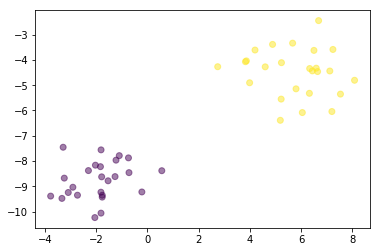

In [442]:
X,Y = create_data()
plt.scatter(X[:,0] , X[:,1], c=Y,alpha=0.5)
plt.show()

In [285]:
lr = 0.0001
C = 100
W = W.reshape(-1,)
for i in range(10000):
    for x,y in zip(X, Y):
        derivate_w = W - C*y*x if np.sum(W.T*x)*y < 1 else W
        derivate_b = C*y
#         print(W,b)
        W = W - (lr/(i/10)+1)*(derivate_w)
        b = b - (lr/(i/10))*derivate_b

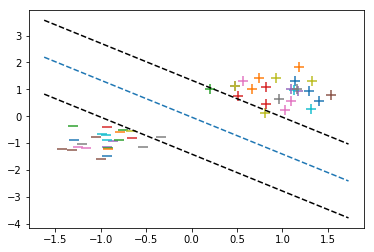

In [518]:
lr = 0.001
C = 0.001
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



W = np.zeros((X.shape[1],1))
b = np.zeros([])

X,Y = create_data()
W = W.reshape(-1,)

sc.fit(X)
X = sc.transform(X)

for i in range(100000):
    for x,y in zip(X, Y):
        contd = (W.T.dot(x) + b)*y
        
        derivate_w = C*W/(i+1) - y*x if contd < 1 else C*W/(i+1)
        derivate_b = 0 if contd < 1 else y 

        W = W - lr * derivate_w
        b = b - lr * derivate_b * 0.0001
        
def plot( X, Y):
    for val, inp in enumerate(X):
        if Y[val] == 0:
            plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
        else:
            plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5) 

plot(X,Y)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())

y_vals = -W[0]/W[1] * (x_vals-b )
y_vals_p = -W[0]/W[1] * (x_vals-b-1 )
y_vals_n = -W[0]/W[1] * (x_vals-b+1 )

plt.plot(x_vals, y_vals, '--')  
plt.plot(x_vals, y_vals_p, '--', c = 'black')  
plt.plot(x_vals, y_vals_n, '--',c = 'black')  

In [448]:
lr = 0.001
C = 0.001
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



W = np.zeros((X.shape[1],1))
b = np.zeros([])

X,Y = create_data()
W = W.reshape(-1,)

sc.fit(X)
X = sc.transform(X)

for i in range(100000):
    for x,y in zip(X, Y):
        contd = (W.T.dot(x) + b)*y
        
        derivate_w = C*W/(i+1) - y*x if contd < 1 else C*W/(i+1)
        derivate_b = 0 if contd < 1 else C*y 

        W = W - lr * derivate_w
        b = b - lr * derivate_b * 0.01
        
def plot( X, Y):
    for val, inp in enumerate(X):
        if Y[val] == 0:
            plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
        else:
            plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5) 
            

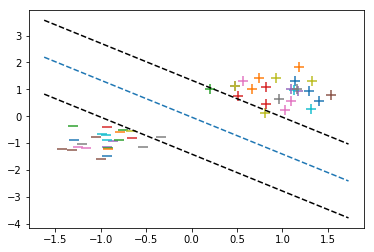

In [451]:
plot(X,Y)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())

y_vals = -W[0]/W[1] * (x_vals-b )
y_vals_p = -W[0]/W[1] * (x_vals-b-1 )
y_vals_n = -W[0]/W[1] * (x_vals-b+1 )

plt.plot(x_vals, y_vals, '--')  
plt.plot(x_vals, y_vals_p, '--', c = 'black')  
plt.plot(x_vals, y_vals_n, '--',c = 'black')  
             

In [458]:
np.sum(C*np.dot(W1.T,W1)*0.5 +  np.maximum(np.zeros_like(y), 1-np.dot(X,W1)+b))

50.937652888899734

In [801]:
class SVM:
    def __init__(self,lr, C, n_iter):
        self.lr = lr
        self.C = C
        self.n_iter = n_iter
        self.W_final = 0
        self.b_final = 0
        
    def fit(self, X, Y):
        
        W = np.zeros((X.shape[1],1))
        b = np.zeros([])
        
        W = W.reshape(-1,)
        
        for i in range(self.n_iter):

            for x,y in zip(X, Y):
                
                contd = (W.T.dot(x) + b)*y
                
                # Decay lr for W 
                derivate_w = self.C*W/(i+1) - y*x if contd < 1 else self.C*W/(i+1)
                derivate_b = 0 if contd < 1 else y 

                W = W - self.lr * derivate_w
                # Train b at a slower rate
                b = b - self.lr * derivate_b * 0.001
                
        self.W_final = W
        self.b_final = b    
        self.plot(X,Y,W,b)

                
        
                
    def plot(self, X, Y, W, b):

        for val, inp in enumerate(X):
            if Y[val] == 0:
                plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
            else:
                plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5) 


        y_vals = -W[0]/W[1] * (x_vals-b )
        y_vals_p = -W[0]/W[1] * (x_vals-b-1 )
        y_vals_n = -W[0]/W[1] * (x_vals-b+1 )

        plt.plot(x_vals, y_vals, '--')  
        plt.plot(x_vals, y_vals_p, '--', c = 'black')  
        plt.plot(x_vals, y_vals_n, '--',c = 'black')  

        plt.show()
        
    def predict(self, X):
        y_pred = np.sum(svm.W_final*X + svm.b_final, axis = 1)
        y_pred = np.array([ 1 if y > 0 else -1 for y in y_pred])
        return y_pred

In [815]:
svm = SVM(lr=0.001,C=0.001,n_iter=10000)

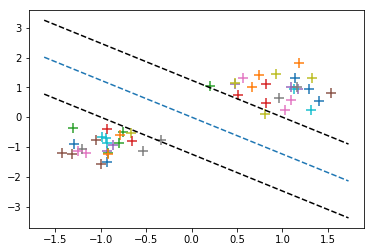

In [816]:
X,Y = create_data()

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
Y = np.array([ -1 if y == 0 else 1 for y in Y])

svm.fit(X,Y)

In [817]:
svm.W_final,svm.b_final

(array([1.11457435, 0.89980964]), 0.00021099999999999952)

In [818]:
predictions = svm.predict(X)
print("The accuracy is : ", np.sum(Y == predictions)/len(Y))

The accuracy is :  1.0


In [819]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', degree=1)

svm.fit(X,Y)
svm.coef_, svm.coef0

(array([[1.1046802 , 0.83297147]]), 0.0)

In [820]:
predictions = svm.predict(X)
print("The accuracy is : ", np.sum(Y == predictions)/len(Y))

The accuracy is :  1.0
